## 文本展示与可视化
在任何建模问题之前，一般我们都会对数据进行一定的分析，文本也不例外，不过文本并不像很多业务数据，是数值形态的，这时候很多统计的方式，是大家理解数据的初步。而文本的可视化，经常会用到词云的形式，词云是很有说服力的一种可视化方式，尤其是对于文本中心内容展示，下面我们来学习一下，怎么去生成自己的文本上的词云。
![](./images/imdb.png)
- wordcloud的安装方式<br />
  pip install wordcloud

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from wordcloud import WordCloud,ImageColorGenerator
#import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode
from PIL import Image

### 读取imdb数据集

In [3]:
def read_data(data_path_list):
    all_data = []
    for data_path in data_path_list:
        print("read{} pos/ file".format(data_path))
        for file in os.listdir(data_path + "pos/"):
            with open(data_path + "pos/" + file, "r", encoding="utf-8") as f:
                all_data.append("".join(f.readlines()))
            f.close()
        
        print("read{} neg/ file".format(data_path))
        for file in os.listdir(data_path + "neg/"):
            with open(data_path + "neg/" + file, "r", encoding="utf-8") as f:
                all_data.append("".join(f.readlines()))
            f.close()
    print("all_data length: {}".format(len(all_data)))
    return all_data

In [4]:
data_path_list = ["./data/aclImdb/train/", "./data/aclImdb/test/"]
datas = read_data(data_path_list)

read./data/aclImdb/train/ pos/ file
read./data/aclImdb/train/ neg/ file
read./data/aclImdb/test/ pos/ file
read./data/aclImdb/test/ neg/ file
all_data length: 50000


In [5]:
print(datas[:2])

["Overall, I thought it a very nice movie - I hate to use the word 'nice' as it's rather dry but it was very beautiful to look at and the central performances by Rupert Friend and Emily Blunt were very strong. What I liked most was that despite the gleaming aesthetics of the costumes and the settings, all gilded and shiny, this aspect never took over the heart of the film which was good, strong writing (thank you Julian Fellowes :D); nothing too flamboyant or saturated with pomp, i.e not sensationalised greatly (when Victoria is dragged out of bed to be informed she is now Queen, well you couldn't get a less glamorous hand over of the crown). It was paced gently and every line in the film held its worth.<br /><br />Undoubtedly the portrayal of the love between Victoria and Albert, though somewhat fairytale-ish on the face it, was in fact a slow burning candle and Friend and Blunt did well to show how effortlessly these two people 'fitted' together despite the union being initially arra

In [6]:
##去掉<br /><br />以及标点符号等

In [7]:
data = []
for item in datas:
    text = re.sub(r"<[^>]+>", "", item)
    text = re.sub("[\',.-;()\"]+", "", text)
    data.append(text)

['Overall I thought it a very nice movie - I hate to use the word nice as its rather dry but it was very beautiful to look at and the central performances by Rupert Friend and Emily Blunt were very strong What I liked most was that despite the gleaming aesthetics of the costumes and the settings all gilded and shiny this aspect never took over the heart of the film which was good strong writing thank you Julian Fellowes D nothing too flamboyant or saturated with pomp ie not sensationalised greatly when Victoria is dragged out of bed to be informed she is now Queen well you couldnt get a less glamorous hand over of the crown It was paced gently and every line in the film held its worthUndoubtedly the portrayal of the love between Victoria and Albert though somewhat fairytale-ish on the face it was in fact a slow burning candle and Friend and Blunt did well to show how effortlessly these two people fitted together despite the union being initially arranged my fave bit was when they come 

- ### 词云显示
  class wordcloud.WordCloud(
        font_path=None, 
        width=400, 
        height=200, 
        margin=2, 
        ranks_only=None, 
        prefer_horizontal=0.9,
        mask=None, scale=1, 
        color_func=None, 
        max_words=200, 
        min_font_size=4, 
        stopwords=None, 
        random_state=None,
        background_color='black', 
        max_font_size=None, 
        font_step=1, 
        mode='RGB', 
        relative_scaling=0.5, 
        regexp=None, 
        collocations=True,
        colormap=None, 
        normalize_plurals=True)
 
- 参数含义如下：
  - font_path : string //字体路径，需要展现什么字体就把该字体路径+后缀名写上，如：font_path = '黑体.ttf'<br />
  - width : int (default=400) //输出的画布宽度，默认为400像素<br />
  - height : int (default=200) //输出的画布高度，默认为200像素<br />
  - prefer_horizontal : float (default=0.90) //词语水平方向排版出现的频率，默认 0.9 （所以词语垂直方向排版出现频率为 0.1 ）<br />
  - mask : nd-array or None (default=None) //如果参数为空，则使用二维遮罩绘制词云。如果 mask 非空，设置的宽高值将被忽略，遮罩形状被 mask 取代。除全白（#FFFFFF）的部分将不会绘制，其余部分会用于绘制词云。如：bg_pic = imread('读取一张图片.png')，背景图片的画布一定要设置为白色（#FFFFFF），然后显示的形状为不是白色的其他颜色。可以用ps工具将自己要显示的形状复制到一个纯白色的画布上再保存，就ok了。<br />
  - scale : float (default=1) //生成词云图片的分辨率，值越大，分辨率越高。<br />
  - min_font_size : int (default=4) //显示的最小的字体大小<br />
  - font_step : int (default=1) //字体步长，如果步长大于1，会加快运算但是可能导致结果出现较大的误差。<br />
  - max_words : number (default=200) //要显示的词的最大个数<br />
  - stopwords : set of strings or None //设置需要屏蔽的词，如果为空，则使用内置的STOPWORDS<br />
  - background_color : color value (default=”black”) //背景颜色，如background_color='white',背景颜色为白色。<br />
  - max_font_size : int or None (default=None) //显示的最大的字体大小<br />
  - mode : string (default=”RGB”) //当参数为“RGBA”并且background_color不为空时，背景为透明。<br />
  - relative_scaling : float (default=.5) //词频和字体大小的关联性<br />
  - color_func : callable, default=None //生成新颜色的函数，如果为空，则使用 self.color_func<br />
  - regexp : string or None (optional) //使用正则表达式分隔输入的文本<br />
  - collocations : bool, default=True //是否包括两个词的搭配<br />
  - colormap : string or matplotlib colormap, default=”viridis” //给每个单词随机分配颜色，若指定color_func，则忽略该方法。

- 根据文本生成词云

In [8]:
datas = ' '.join([iterm for iterm in data])

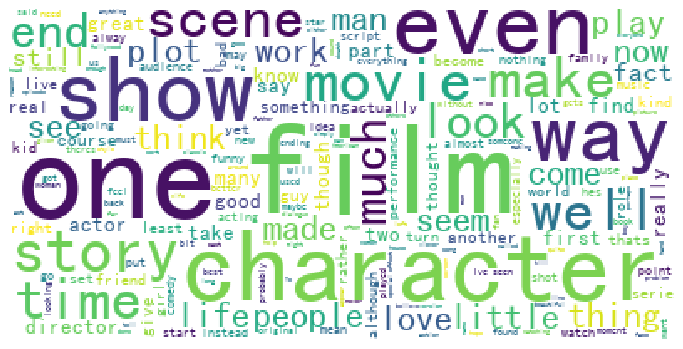

In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white", 
                    max_font_size=80).generate_from_text(datas)
plt.axis("off")
plt.imshow(wordcloud)

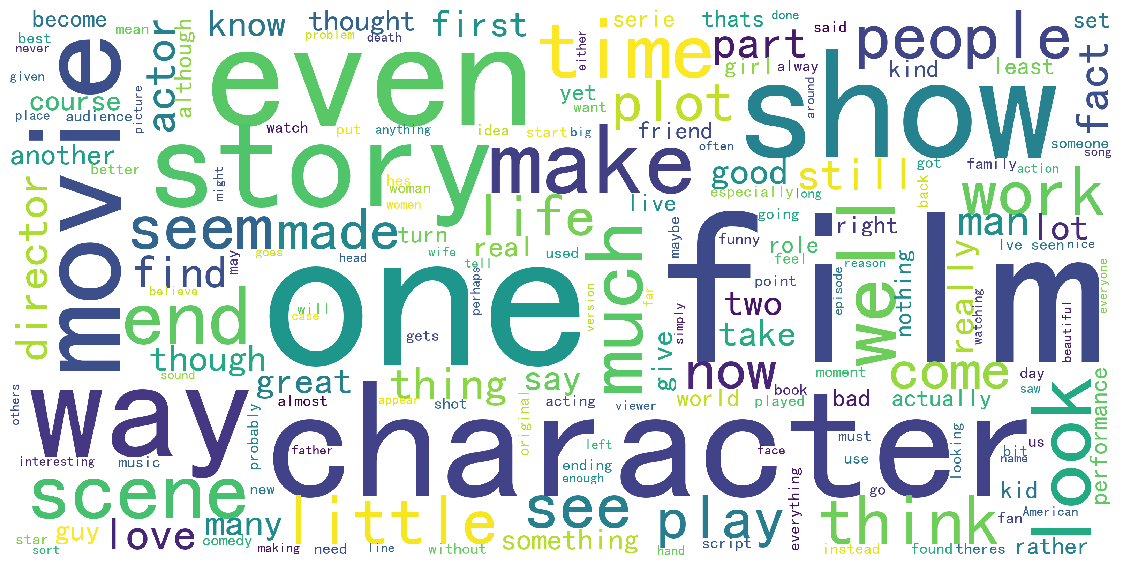

In [8]:
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white", scale=8,
                    max_font_size=80).generate(datas)  
plt.axis("off")
plt.imshow(wordcloud)
wordcloud.to_file("./images/wordcloud_text.png")

- 生成自定义的图片的词云

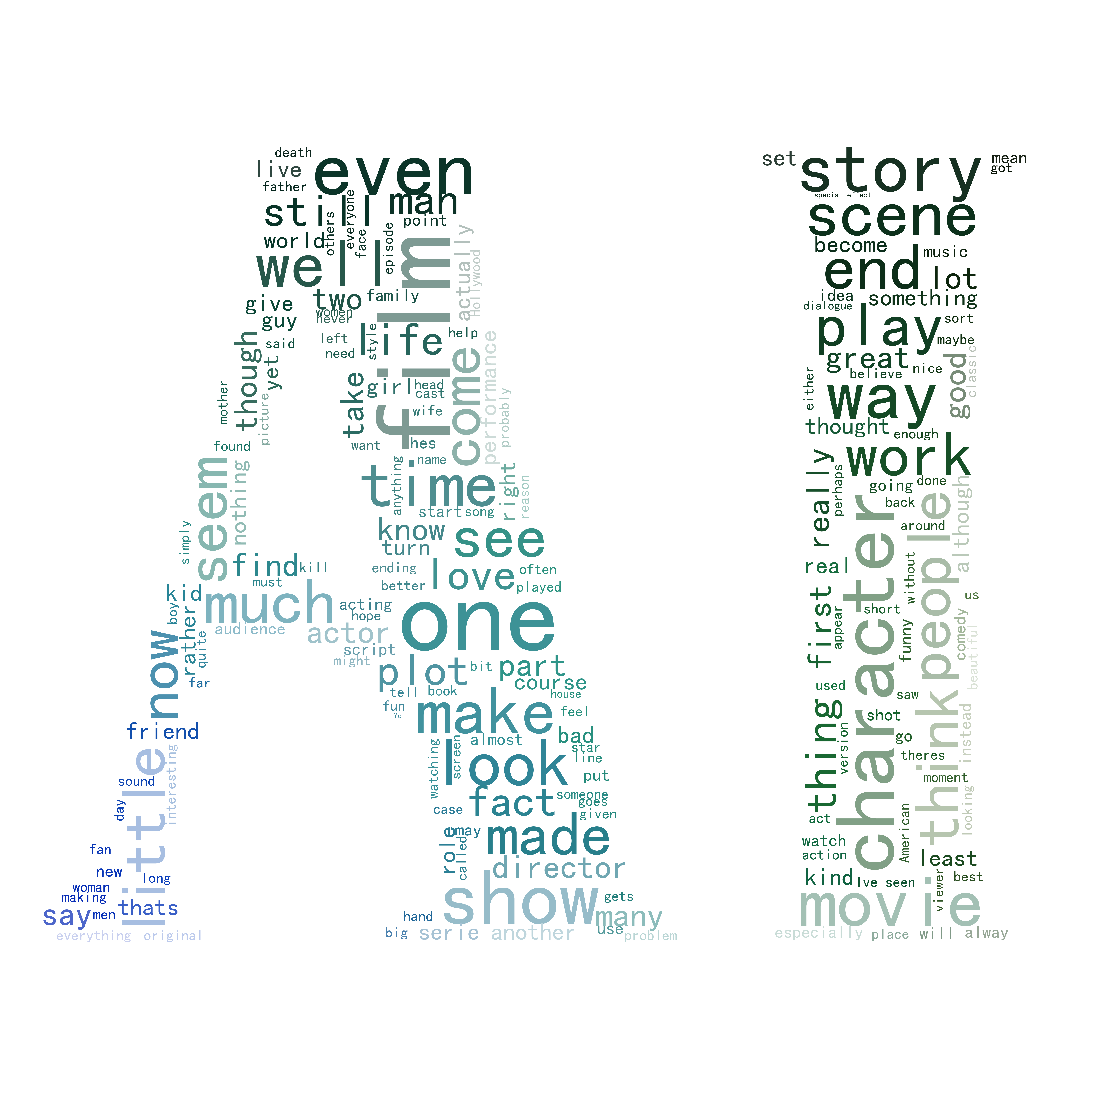

In [12]:
img = np.array(Image.open("./images/ai.png"))
wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",mask=img, scale=8,
                    max_font_size=80).generate(datas) 
bimgColors=ImageColorGenerator(img)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
wordcloud.to_file("./images/wordcloud_text_ai.png")

- 根据词频生成词云

In [10]:
words_dict = dict()
for doct in data:
    tokens = doct.split(" ")
    for token in tokens:
        if token in words_dict:
            words_dict[token] += 1
        else:
            words_dict[token] = 1
#print(words_dict)

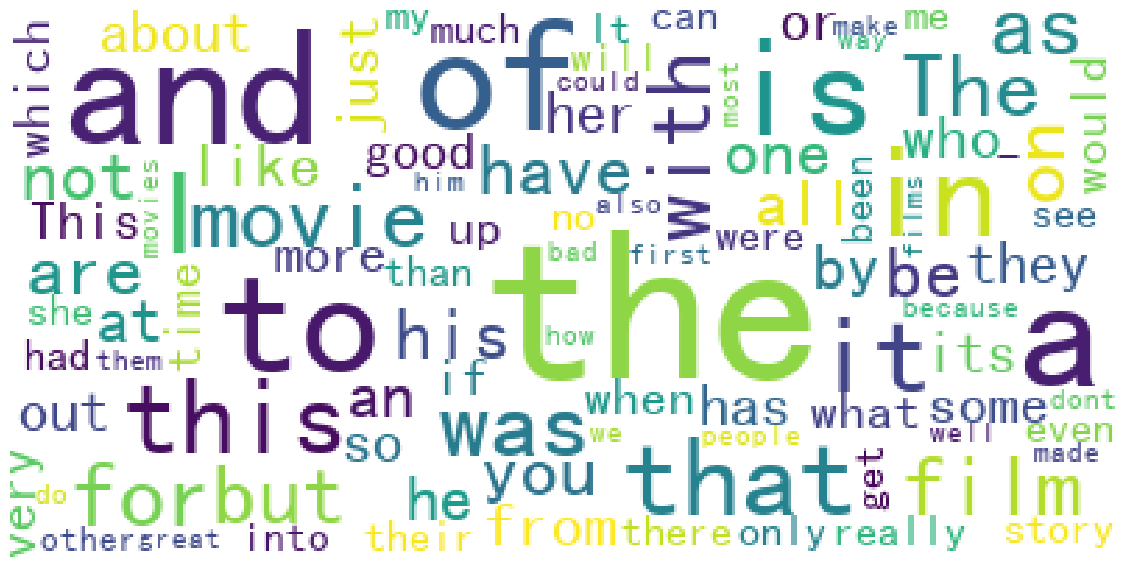

In [11]:
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white", max_words=100,
                    max_font_size=80).fit_words(words_dict) 
plt.axis("off")
plt.imshow(wordcloud)
wordcloud.to_file("./images/wordcloud_words.png")

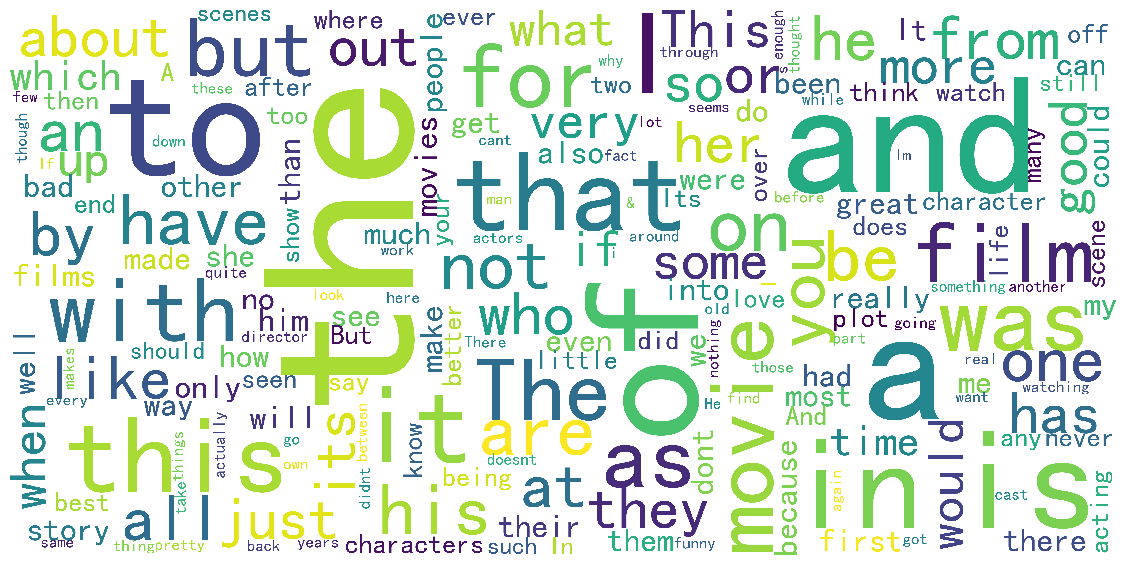

In [13]:
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white", max_words=200, scale=16,
                    max_font_size=80).generate_from_frequencies(words_dict) 
plt.axis("off")
plt.imshow(wordcloud)
